# Part 1: GRASS GIS intro

In this first part, we will demonstrate starting GRASS GIS, creating new project and basic data visualization.

## Notebook environment

By default all cells are running Python:

In [1]:
import sys
v = sys.version_info
print(f"We are using Python {v.major}.{v.minor}.{v.micro}")

We are using Python 3.8.12


We can also use `!` to run individual lines in the terminal.

In [2]:
!echo Howdy

Howdy


## Start GRASS GIS

Import Python standard library and IPython packages we need.

In [3]:
# import subprocess
# import sys

We're going to import the GRASS GIS python API (`grass.script`) and the GRASS GIS Jupyter package (`grass.jupyter`). But first, we need to find the path to those packages using the `--config python_path` command. This command is slightly different for each operating system.

Edit the box below to reflect your operating system and, if on Windows, your GRASS GIS version.

Now, we can use `subprocess.check_output` to find the path and `sys.path.append` to add it to the path.

In [4]:
# FOR WINDOWS:
# grass_call = "grass82"
# shell_setting = True

# FOR MAC/LINUX
# grass_call = "/Applications/GRASS-8.4.app/Contents/Resources/bin/grass"
# shell_setting = False

In [1]:
import sys
sys.path.append('/Applications/GRASS-8.4.app/Contents/Resources/etc/python')

And now we can import the GRASS python packages!

In [2]:
from grass import script as gs

In [4]:
import grass.jupyter as gj

# Create a GRASS GIS session.
gj.init("../data", "nc_spm_08_grass7", "user1")

In [10]:

# Start GRASS Session
session = gj.init("./../data",  "dix_park", "PERMANENT")

## Import data

<div class="alert alert-info">
If you are running this locally, download the data <a href="http://fatra.cnr.ncsu.edu/foss4g2021/">here</a> and put it in the same directory as this notebook.
</div>

We will import prepared digitial surface model (DSM), bare ground (digital terrain model, DTM) and ortho maps. 
The data CRS matches the CRS of the *dix_park* location, so we don't need to reproject it.

In [5]:
!r.import input=dsm.tif output=dsm resample=bilinear
!r.import input=ground.tif output=ground
!r.import input=ortho.tif output=ortho

Importing raster map <dsm>...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
gridshift: could not find required grid(s).
pipeline: Pipeline: Bad step definition: inv (File not found or invalid)
gridshift: could not find required grid(s).
pipeline: Pipeline: Bad step definition: inv (File not found or invalid)
gridshift: could not find required grid(s).
pipeline: Pipeline: Bad step definition: proj=gridshift (File not found or invalid)
gridshift: could not find required grid(s).
pipeline: Pipeline: Bad step definition: proj=gridshift (File not found or invalid)
Estimated target resolution for input band <dsm>: 0.9795300384376107
Reprojecting <dsm>...
gridshift: could not find required grid(s).
pipeline: Pipeline: Bad step definition: proj=gridshift (File not found or invalid)
gridshift: could not find required grid(s).
pipeline: Pipeline: Bad step definition: proj=gridshift (File not found or i

Next, we will import pre-downloaded OSM data of roads restricted to our study area. We obtained the roads using Overpass Turbo with this [query](https://overpass-turbo.eu/s/1aGu) and exported to GeoJSON. 

The data comes in EPSG:4326, so it will be automatically reprojected to UTM during the import.

In [8]:
!v.import input=roads.geojson output=roads

Importing <roads.geojson> ...
Check if OGR layer <roads> contains polygons...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
Creating attribute table for layer <roads>...
Default driver / database set to:
driver: sqlite
database: $GISDBASE/$LOCATION_NAME/$MAPSET/sqlite/sqlite.db
Column name <@id> renamed to <xid>
Column name <tiger:cfcc> renamed to <tiger_cfcc>
Column name <tiger:county> renamed to <tiger_county>
Column name <tiger:name_base> renamed to <tiger_name_base>
Column name <tiger:name_base_1> renamed to <tiger_name_base_1>
Column name <tiger:name_direction_prefix> renamed to
<tiger_name_direction_prefix>
Column name <tiger:name_type> renamed to <tiger_name_type>
Column name <tiger:zip_left> renamed to <tiger_zip_left>
Column name <tiger:zip_right> renamed to <tiger_zip_right>
Importing 148 features (OGR layer <roads>)...

Let's look at the available data in our location:

In [9]:
!g.list type=raster,vector -m -t

raster/aspect@PERMANENT
raster/basin_50K@PERMANENT
raster/boundary_county_500m@PERMANENT
raster/cfactorbare_1m@PERMANENT
raster/cfactorgrow_1m@PERMANENT
raster/dsm@user1
raster/el_D782_6m@PERMANENT
raster/el_D783_6m@PERMANENT
raster/el_D792_6m@PERMANENT
raster/el_D793_6m@PERMANENT
raster/elev_lid792_1m@PERMANENT
raster/elev_ned_30m@PERMANENT
raster/elev_srtm_30m@PERMANENT
raster/elev_state_500m@PERMANENT
raster/elevation@PERMANENT
raster/elevation_shade@PERMANENT
raster/facility@PERMANENT
raster/geology_30m@PERMANENT
raster/ground@user1
raster/lakes@PERMANENT
raster/landclass96@PERMANENT
raster/landcover_1m@PERMANENT
raster/landuse96_28m@PERMANENT
raster/lsat5_1987_10@landsat
raster/lsat5_1987_20@landsat
raster/lsat5_1987_30@landsat
raster/lsat5_1987_40@landsat
raster/lsat5_1987_50@landsat
raster/lsat5_1987_60@landsat
raster/lsat5_1987_70@landsat
raster/lsat7_2000_10@landsat
raster/lsat7_2000_20@landsat
raster/lsat7_2000_30@landsat
raster/lsat7_2000_40@landsat
raster/lsat7_2000_50@land

## Data visualization

We will call d.rast/d.vect modules using the [GRASS Jupyter API](https://grass.osgeo.org/grass-stable/manuals/libpython/grass.jupyter.html). The `Map` class creates and displays GRASS maps as static PNG images.

First let's display bare ground elevation with the roads dataset:

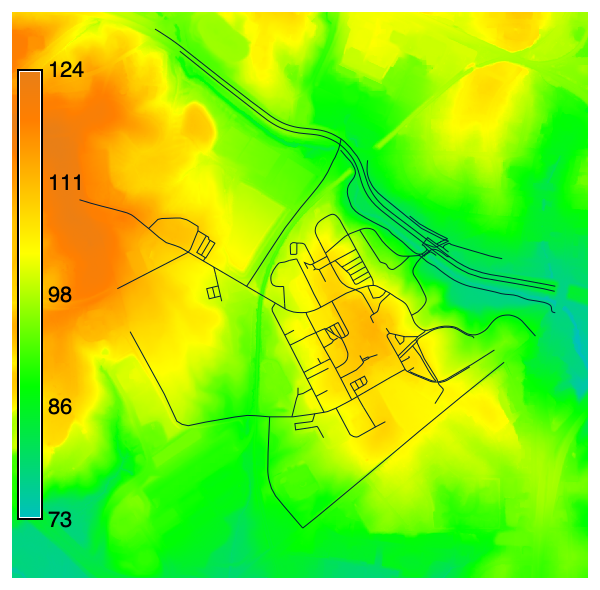

In [10]:
# Create Map instance
elevation_map = gj.Map()
# Add a raster and vector to the map
elevation_map.d_rast(map="ground")
elevation_map.d_vect(map="roads")
elevation_map.d_legend(raster="ground")
# Display map
elevation_map.show()

Next, display road _Umstead Drive_ in yellow on top of ortho. Method `d_vect` can be called with options of [d.vect](https://grass.osgeo.org/grass-stable/manuals/d.vect.html).

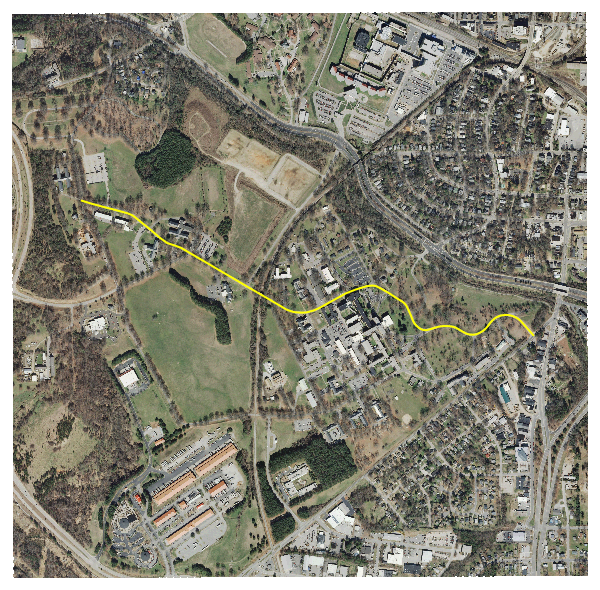

In [11]:
ortho_map = gj.Map()
ortho_map.d_rast(map="ortho")
ortho_map.d_vect(map="roads", width="2", color="yellow", where="name = 'Umstead Drive'")
ortho_map.show()

Here is how we can visualize data interactively with folium:


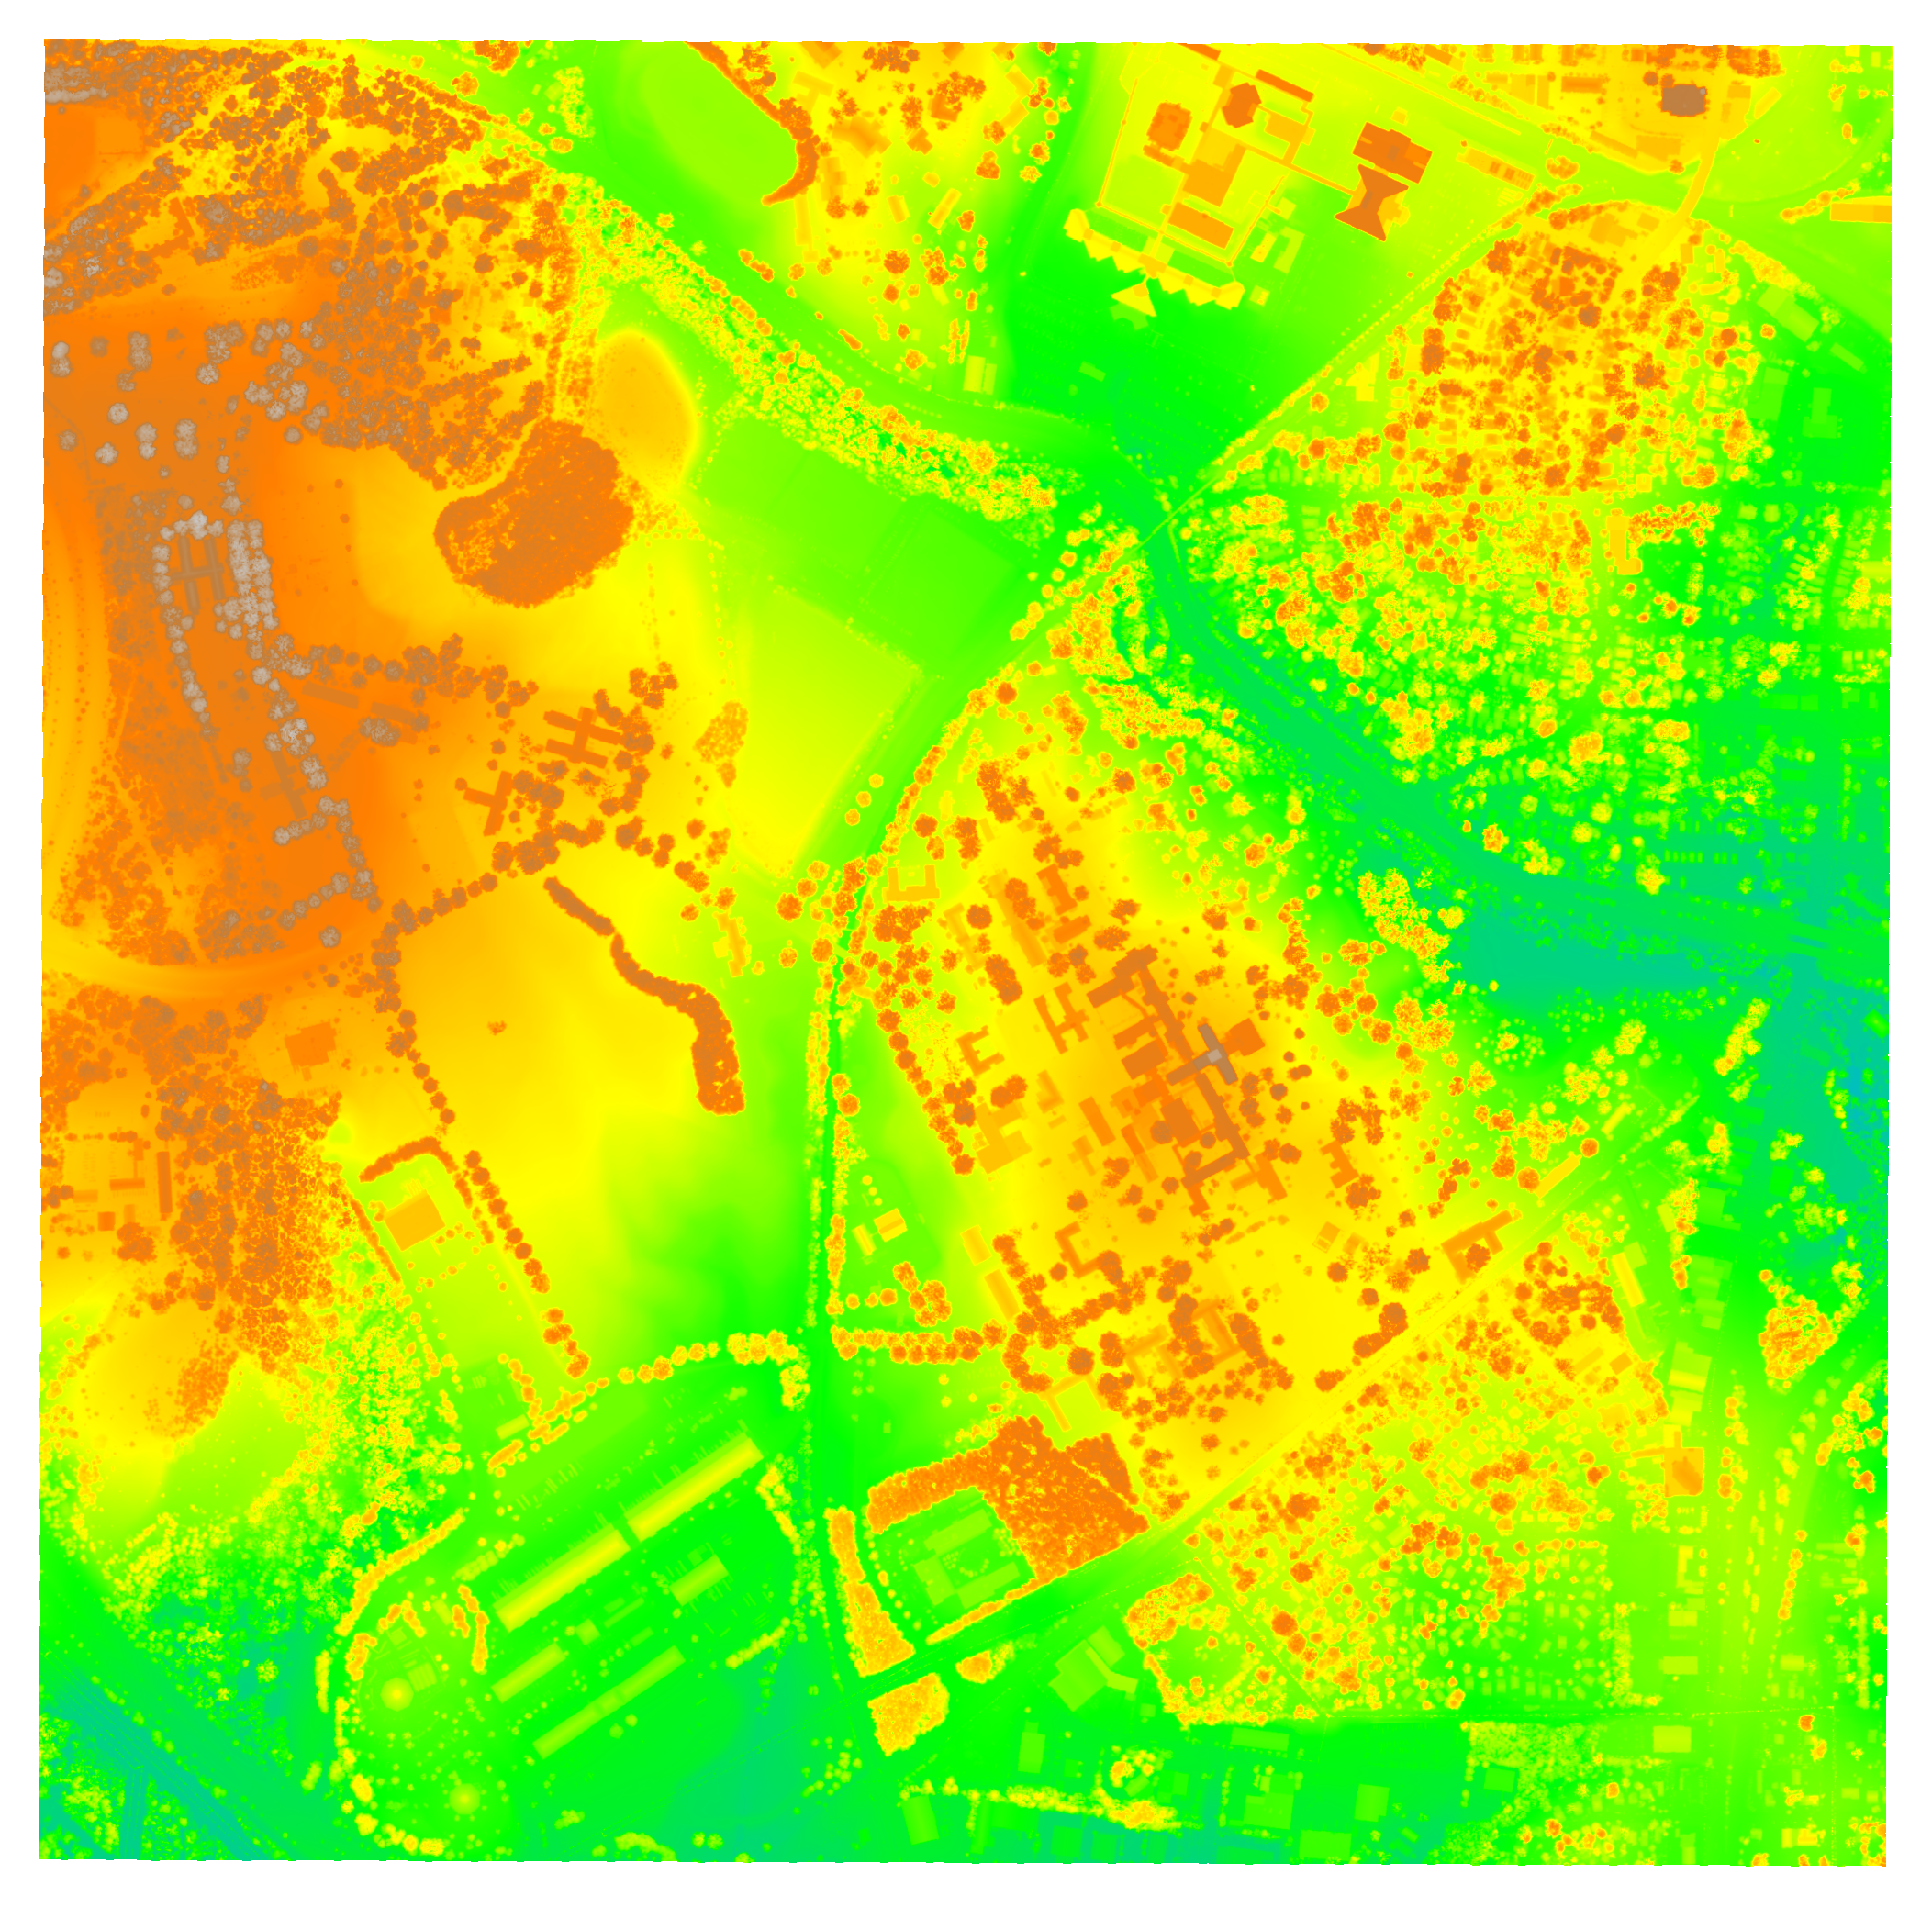

In [13]:
roads_map = gj.InteractiveMap()
roads_map.add_raster("dsm", opacity=0.5)
roads_map.add_vector("roads")
roads_map.add_layer_control(position="bottomright")
roads_map.show()

We can also visualize data in 3D. Here we drape the ortho over the DSM.


In [14]:
map3d = gj.Map3D()
map3d.render(elevation_map="dsm", color_map="ortho",
             position=(0.5, 1), height=3000, perspective=12)
map3d.show()

ModuleNotFoundError: No module named 'PIL'

In [ ]:
map3d = gj.Map3D()
map3d.render(elevation_map="dsm", resolution_fine=1, color_map="ortho",
             light_position=(1, 0, 0.5),
             position=(0.75, 0.35), height=1500, perspective=10)
map3d.show()

## GRASS GIS tools

GRASS functionality is available through tools (also called modules). There are over 500 different tools in the core distribution and over 300 addon tools that can be used to prepare and analyze data.

Tools respect the following naming conventions:

Prefix | Function | Example
------ | -------- | -------
r.* | raster processing | r.mapcalc: map algebra
v.*	| vector processing	| v.clean: topological cleaning
i.*	| imagery processing | i.segment: object recognition
db.* | database management | db.select: select values from table
r3.* | 3D raster processing | r3.stats: 3D raster statistics
t.* | temporal data processing | t.rast.aggregate: temporal aggregation
g.* | general data management | g.rename: renames map
d.* | display | d.rast: display raster map

Note also that some tools have multiple dots in their names. For example, tools staring with v.net.* deal with vector network analysis and r.in.* tools import raster data into GRASS GIS spatial database.

There is a tool for finding other tools:

In [ ]:
!g.search.modules keyword=zonal

Here is how to get all options and flags of a GRASS tool:

In [ ]:
!r.univar --help

This will open the tool's manual page. It will work only locally.

```
g.manual r.univar
```

GRASS modules can be executed either through the GUI, command line or Python interfaces. This is an example how to execute a tool in command line. Specifically, it will extract road _Umstead Drive_ into a new vector `umstead_drive_segments`.

In [ ]:
!v.extract input=roads where="name = 'Umstead Drive'" output=umstead_drive_segments

Now the same in Python:

In [ ]:
gs.run_command("v.extract", input="roads", where="name = 'Umstead Drive'", output="umstead_drive_segments")

### Computational region

Computational region is an important raster concept in GRASS GIS, that allows you to fully control the extent and resolution of your raster computations.
All raster computations will be performed in the specified extent and with the given resolution to ensure consistency.
Among other things, computational region allows us to easily subset larger extent data for quicker testing of analysis, or to run an analysis of specific regions given by e.g. administrative units.

A few points to keep in mind:

 * computational region is defined by region extent and raster resolution
 * applies to all raster operations and vector to raster operations
 * persists between GRASS sessions, can be different for different mapsets (subprojects)
 * advantages: keeps your results consistent, avoids clipping, for computationally demanding tasks set region to smaller extent, check that your result is good and then set the computational region to the entire study area and rerun analysis

Run `g.region -p` to see current region settings:
 

In [ ]:
!g.region -p

The most common way to set region is **based on a raster map** - both extent and resolution. Run again g.region (we include -p flag to always see the resulting region):

In [ ]:
!g.region -p raster=dsm

Computational region can be set also **using a vector map**. In that case, only extent is set (as vector maps do not have any resolution - at least not in the way raster maps do). In the command line, it looks like this:


In [ ]:
!g.region -p vector=roads

However now the resolution was adjusted based on the extent of the vector map, it is no longer a nice rounded number. If that's not desired, we can set it explicitly using -a flag and parameter res. Now the resolution is aligned to even multiples of 2 (the units are the units of the current projection, in our case meters):


In [ ]:
!g.region -p vector=roads res=2 -a

Often we need to set the computational extent based on a vector map, but alignment the resolution to a raster map:

In [ ]:
!g.region -p vector=roads align=dsm

Finally, we can save a specific region for later. This won't actually modify the current region:

In [ ]:
!g.region vector=umstead_drive_segments align=dsm save=road_region

Saved region can be used later on, for example to set the rendering extent:

In [ ]:
elevation_map = gj.Map(saved_region="road_region")
elevation_map.d_rast(map="dsm")
elevation_map.d_vect(map="umstead_drive_segments")
elevation_map.show()

## Python API

There are two Python APIs for accessing a tool's functionality - [GRASS GIS Python Scripting Library](https://grass.osgeo.org/grass-stable/manuals/libpython/script_intro.html) and [PyGRASS](https://grass.osgeo.org/grass-stable/manuals/libpython/pygrass_index.html).
PyGRASS is advantageous for more advanced workflows. Here we will be using Python Scripting Library (`import grass.script as gs`)
as it is simple and straightforward to use.
 

GRASS GIS Python Scripting Library provides functions to call GRASS modules within scripts as subprocesses. The most often used functions include:

 * [run_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.run_command): used with modules which output raster/vector data where text output is not expected
 * [read_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.read_command): used when we are interested in text output
 * [parse_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.parse_command): used with modules producing text output as key=value pair
 * [write_command()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.write_command): for modules expecting text input from either standard input or file


It also provides several wrapper functions for often called modules. The list of convenient wrapper functions with examples includes:

 * Raster metadata using [raster_info()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.raster.raster_info): `gs.raster_info('dsm')`
 * Vector metadata using [vector_info()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.vector.vector_info): `gs.vector_info('roads')`
 * List raster data in current location using [list_grouped()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.list_grouped): `gs.list_grouped(type=['raster'])`
 * Get current computational region using [region()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.core.region): `gs.region()`
 * Run raster algebra using [mapcalc()](https://grass.osgeo.org/grass-stable/manuals/libpython/script.html#script.raster.mapcalc): `gs.mapcalc()`


### Let's practice!
Compute viewshed in Python.
1. Set computational region to match raster `dsm`:

2. Compute binary viewshed (visible - 1, not visible - 0) using [r.viewshed](https://grass.osgeo.org/grass-stable/manuals/r.viewshed.html) using `dsm` raster from X=711260 and Y=3960860:

3. Compute size of the visible area, using [r.univar](https://grass.osgeo.org/grass-stable/manuals/r.univar.html) computing univariate statistics. Use `gs.parse_command()` together with r.univar's `-g` flag to get a number of visible cells. Use `gs.region()` to get the cell size. Compute percentage of area that is visible.

4. Display the viewshed overlaid over the orthophoto `ortho`. Use [d.rast](https://grass.osgeo.org/grass-stable/manuals/d.rast.html)'s `values` to display only visible cells.

Find answers when you edit this cell.
<!--
# 1. set computational region based on DSM
gs.run_command("g.region", raster="dsm")
# 2. Compute viewshed, flag 'b' is for binary (0 and 1) output 
gs.run_command("r.viewshed", input="dsm", output="viewshed", flags="b", coordinates=(711260, 3960860))
# 3. Compute basic univariate statistics, flag 'g' is for parsable output
univar = gs.parse_command("r.univar", map="viewshed", flags='g')
# 4. Get current region settings to get cell size
region = gs.region()
cell_size = region["nsres"] * region["ewres"]
percentage = 100 * float(univar['sum']) / float(univar['n'])
area = cell_size * float(univar['sum'])
print(f"Percentage of visible area is {percentage:.2f}%, which is {area / 10000:.2f} ha")

viewshed_map = gj.Map()
viewshed_map.d_rast(map="ortho")
# select only cells with value 1 to visualize
viewshed_map.d_rast(map="viewshed", values=1)
viewshed_map.show()
-->